## With Paper Release Year

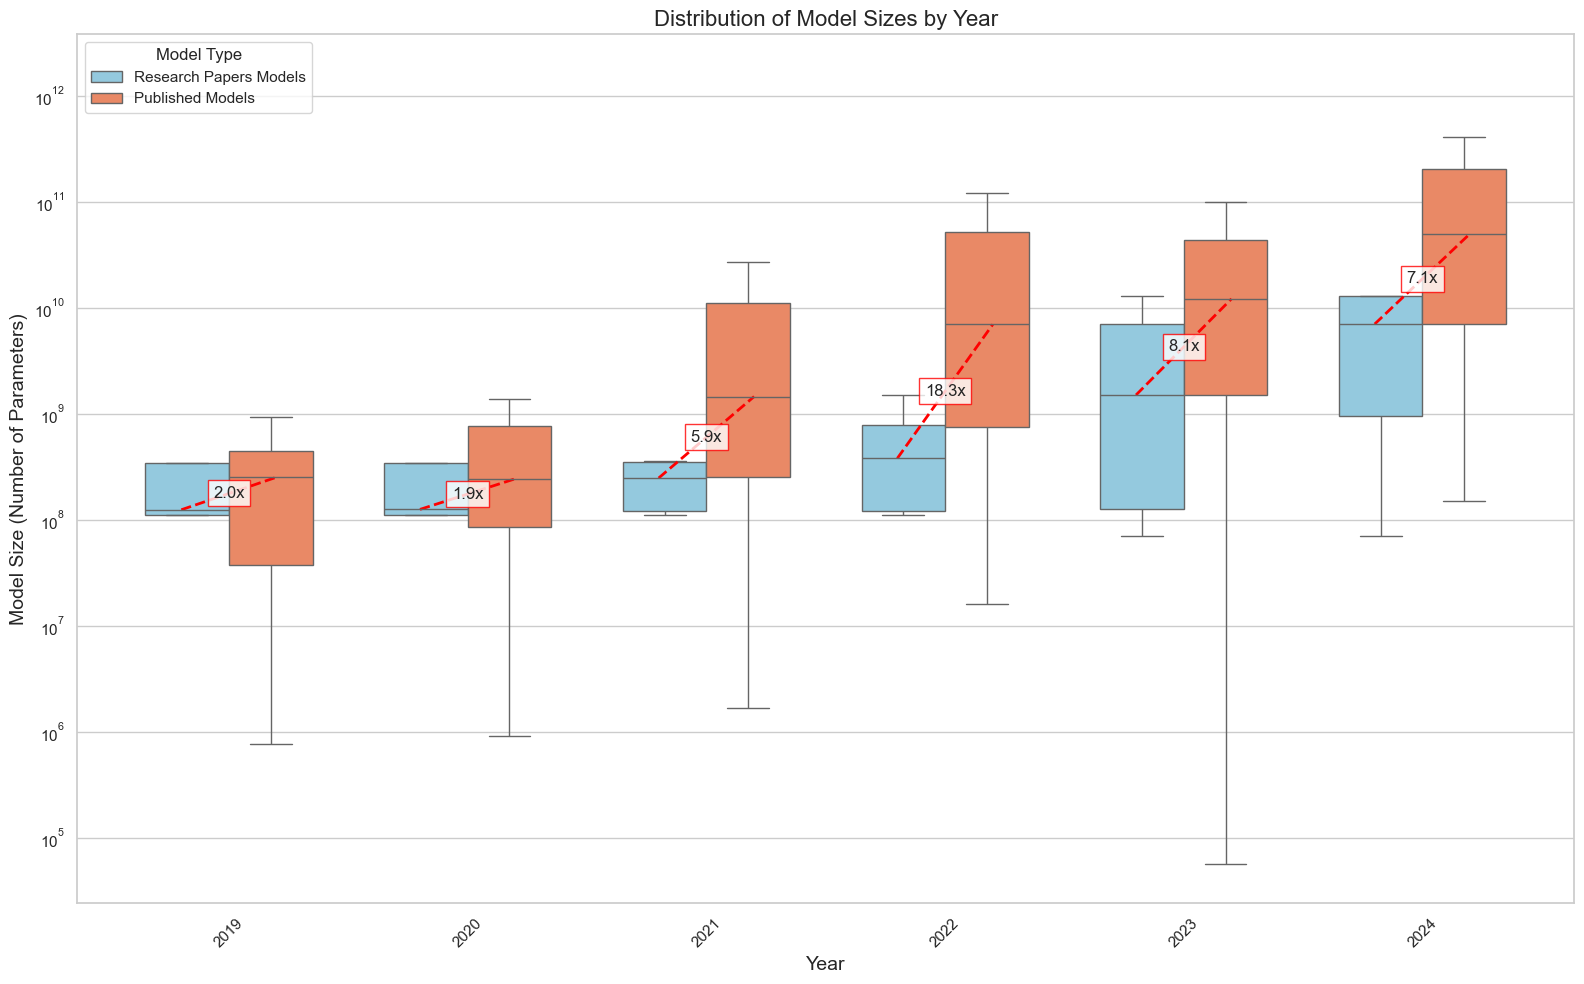

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Ensure the 'year' and 'param count' columns are correctly typed for the research DataFrame
df_research['year'] = df_research['year'].astype(int)
df_research['param count'] = df_research['param count'].astype(float)
df_research['Type'] = 'Research Papers Models'

# Filter the published DataFrame to include only models from 2019 to 2024
df_published['Publication date'] = pd.to_datetime(df_published['Publication date'])
df_published = df_published[(df_published['Publication date'].dt.year >= 2019) & 
                            (df_published['Publication date'].dt.year <= 2024)]
df_published['year'] = df_published['Publication date'].dt.year
df_published['param count'] = df_published['Parameters'].astype(float)
df_published['Type'] = 'Published Models'

# Combine both DataFrames
df_combined = pd.concat([df_research[['year', 'param count', 'Type']], 
                         df_published[['year', 'param count', 'Type']]], ignore_index=True)

# Ensure years are treated as categorical and sorted
df_combined['year'] = pd.Categorical(df_combined['year'], categories=sorted(df_combined['year'].unique()), ordered=True)

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='year', y='param count', hue='Type', data=df_combined,
                 palette={'Research Papers Models': 'skyblue', 'Published Models': 'coral'},
                 width=0.7, fliersize=0)

# Set the Y-axis to a logarithmic scale
ax.set_yscale('log')

# Add titles and labels
ax.set_title('Distribution of Model Sizes by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Calculate and plot median values
years = sorted(df_combined['year'].unique())
for i, year in enumerate(years):
    research_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Research Papers Models')]['param count'].median()
    published_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Published Models')]['param count'].median()
    
    if not np.isnan(research_median) and not np.isnan(published_median):
        x1, x2 = i - 0.2, i + 0.2
        y1, y2 = research_median, published_median
        plt.plot([x1, x2], [y1, y2], color='red', linestyle='--', linewidth=2)
        gap_ratio = max(y1, y2) / min(y1, y2)
        plt.text(i, np.sqrt(y1 * y2), f'{gap_ratio:.1f}x', 
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))

# Adjust legend
plt.legend(title='Model Type', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

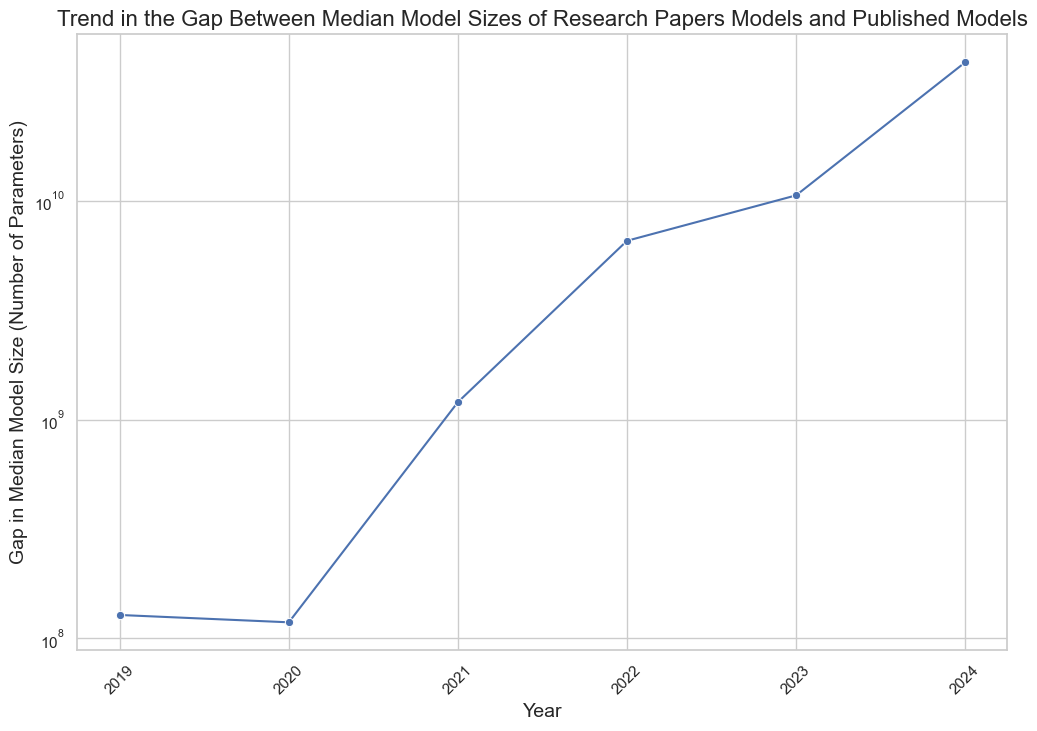

In [3]:
# Calculate the median model size for each year and type
median_sizes = df_combined.groupby(['year', 'Type'])['param count'].median().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
median_pivot = median_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the median sizes
median_pivot['Gap'] =  median_pivot['Published Models'] - median_pivot['Research Papers Models']

# Plot the trend in the gap
plt.figure(figsize=(12, 8))

sns.lineplot(data=median_pivot, x=median_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Median Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Median Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

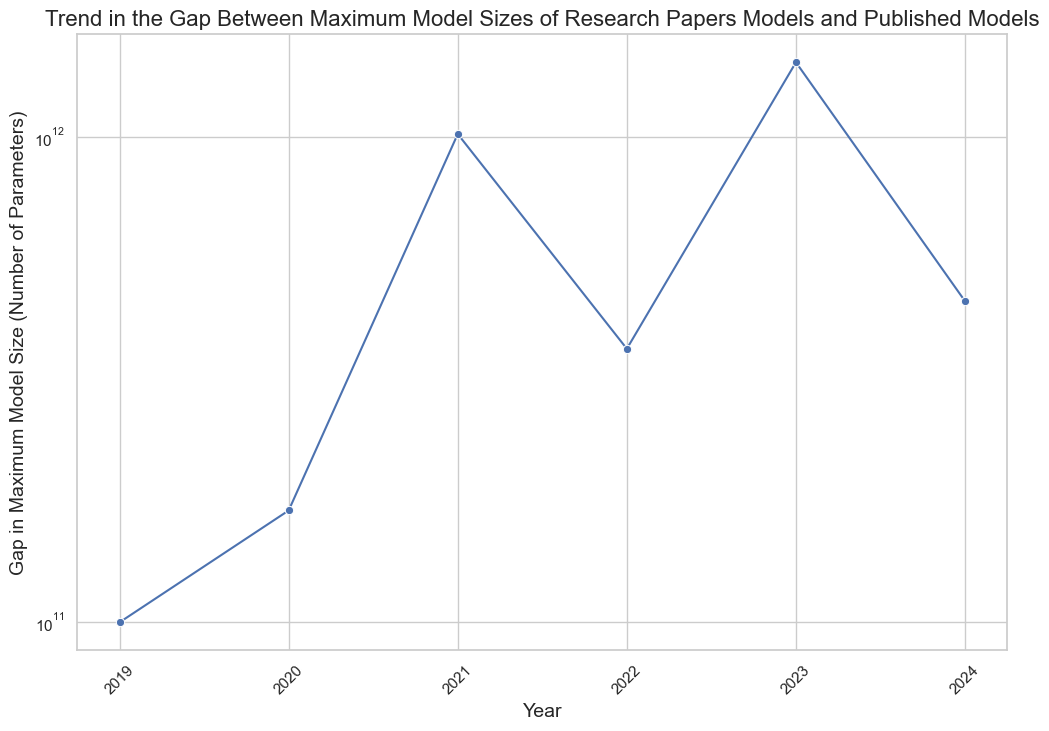

In [4]:

# Calculate the maximum model size for each year and type
max_sizes = df_combined.groupby(['year', 'Type'])['param count'].max().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
max_pivot = max_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the maximum sizes
max_pivot['Gap'] =  max_pivot['Published Models'] - max_pivot['Research Papers Models']

# Plot the trend in the gap for maximum sizes
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_pivot, x=max_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Maximum Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Maximum Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## With Paper First Revision Date

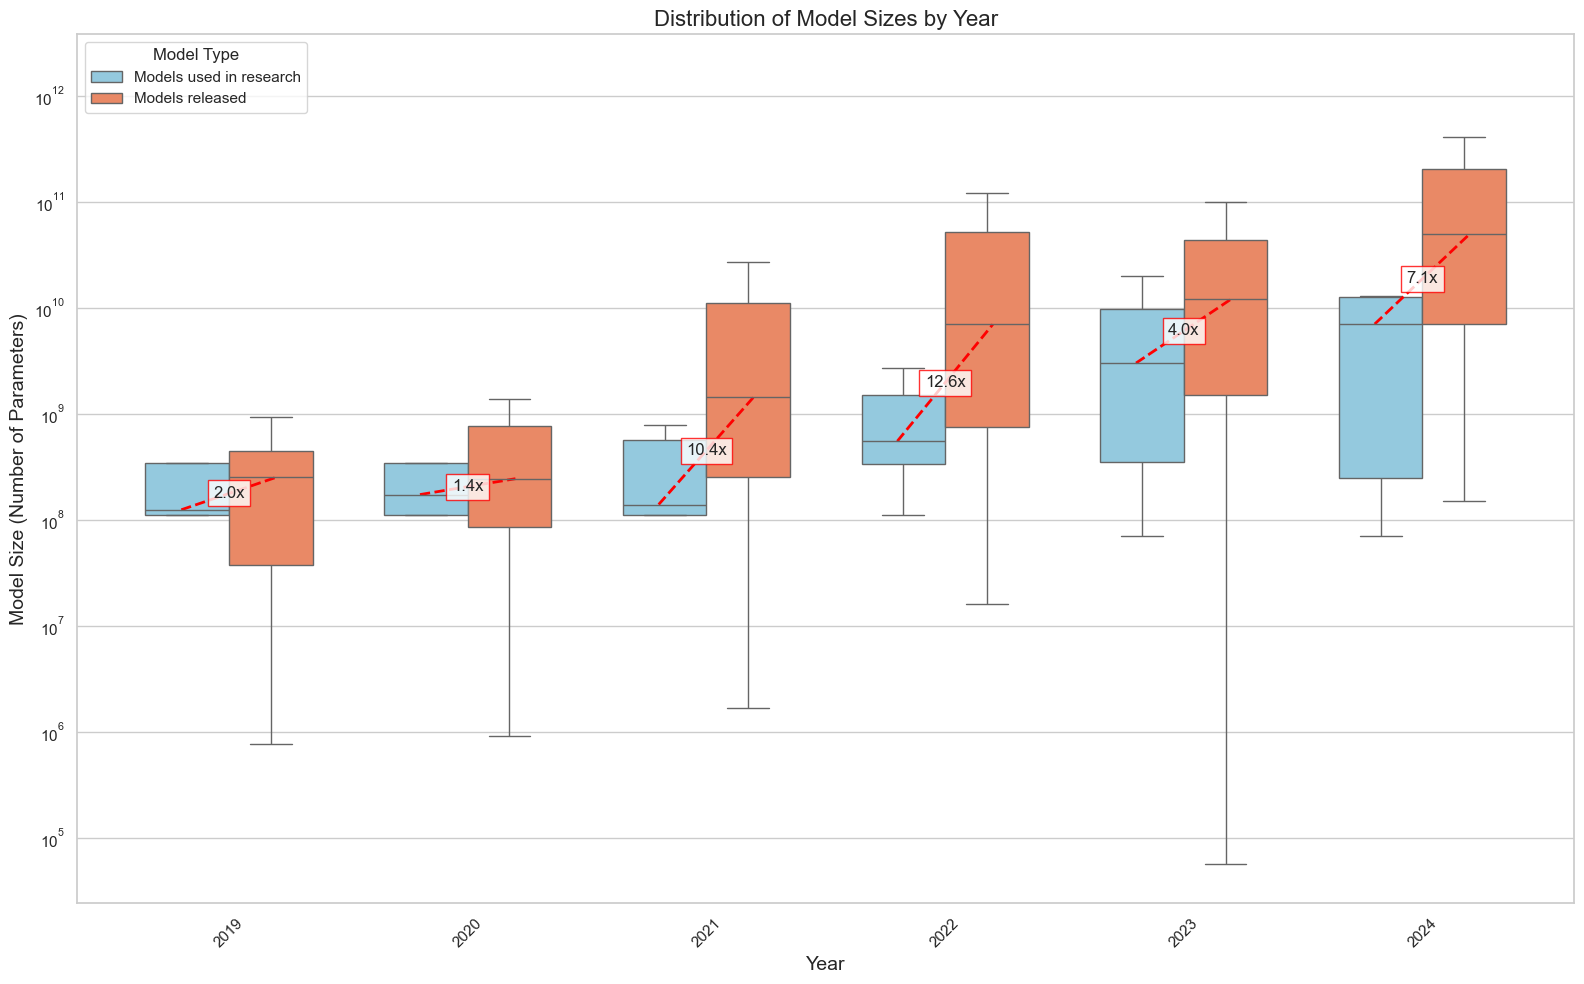

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only_exact_dates.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Ensure the 'year' and 'param count' columns are correctly typed for the research DataFrame
df_research['year'] = pd.to_datetime(df_research['publication date (first revision)']).dt.year
df_research['param count'] = df_research['param count'].astype(float)
df_research['Type'] = 'Models used in research'

# Filter the published DataFrame to include only models from 2019 to 2024
df_published['Publication date'] = pd.to_datetime(df_published['Publication date'])
df_published = df_published[(df_published['Publication date'].dt.year >= 2019) & 
                            (df_published['Publication date'].dt.year <= 2024)]
df_published['year'] = df_published['Publication date'].dt.year
df_published['param count'] = df_published['Parameters'].astype(float)
df_published['Type'] = 'Models released'

# Combine both DataFrames
df_combined = pd.concat([df_research[['year', 'param count', 'Type']], 
                         df_published[['year', 'param count', 'Type']]], ignore_index=True)

# Ensure years are treated as categorical and sorted
df_combined['year'] = pd.Categorical(df_combined['year'], categories=sorted(df_combined['year'].unique()), ordered=True)

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='year', y='param count', hue='Type', data=df_combined,
                 palette={'Models used in research': 'skyblue', 'Models released': 'coral'},
                 width=0.7, fliersize=0)

# Set the Y-axis to a logarithmic scale
ax.set_yscale('log')

# Add titles and labels
ax.set_title('Distribution of Model Sizes by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Calculate and plot median values
years = sorted(df_combined['year'].unique())
for i, year in enumerate(years):
    research_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Models used in research')]['param count'].median()
    published_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Models released')]['param count'].median()
    
    if not np.isnan(research_median) and not np.isnan(published_median):
        x1, x2 = i - 0.2, i + 0.2
        y1, y2 = research_median, published_median
        plt.plot([x1, x2], [y1, y2], color='red', linestyle='--', linewidth=2)
        gap_ratio = max(y1, y2) / min(y1, y2)
        plt.text(i, np.sqrt(y1 * y2), f'{gap_ratio:.1f}x', 
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))

# Adjust legend
plt.legend(title='Model Type', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

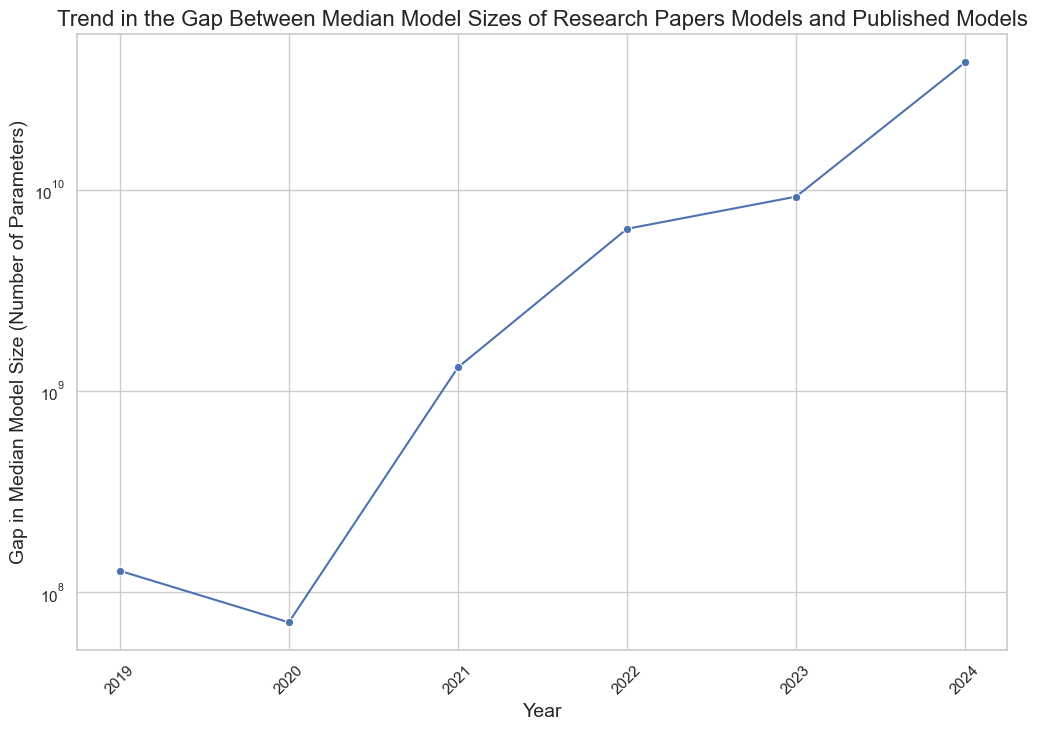

In [7]:
# Calculate the median model size for each year and type
median_sizes = df_combined.groupby(['year', 'Type'])['param count'].median().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
median_pivot = median_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the median sizes
median_pivot['Gap'] =  median_pivot['Published Models'] - median_pivot['Research Papers Models']

# Plot the trend in the gap
plt.figure(figsize=(12, 8))

sns.lineplot(data=median_pivot, x=median_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Median Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Median Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

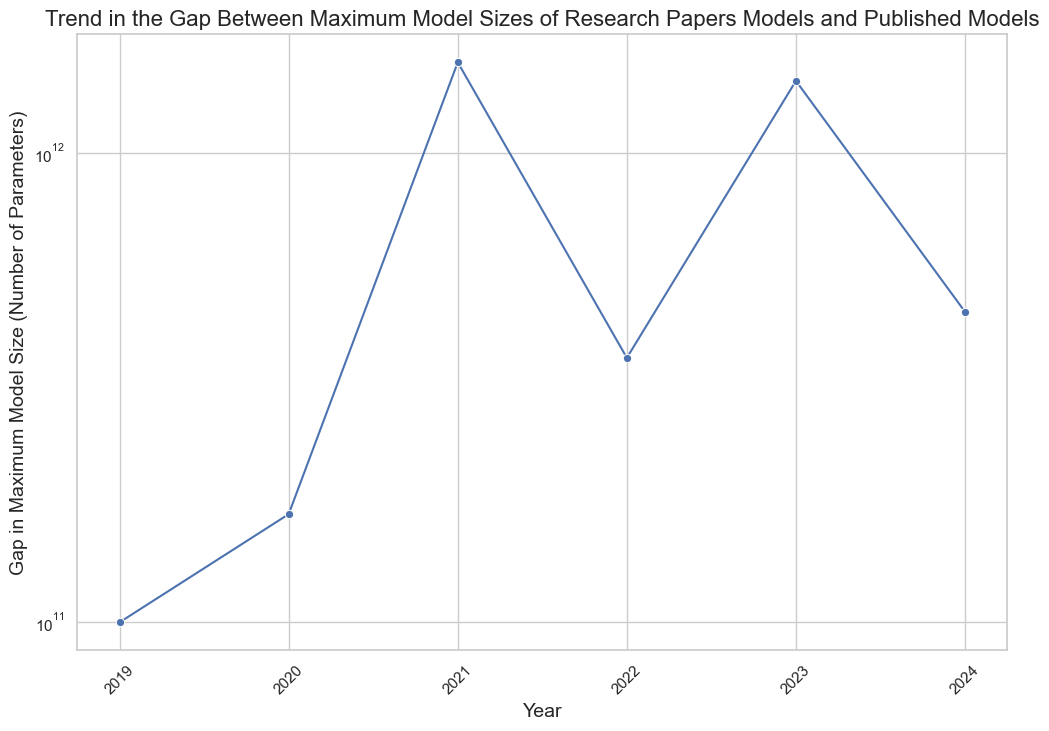

In [8]:

# Calculate the maximum model size for each year and type
max_sizes = df_combined.groupby(['year', 'Type'])['param count'].max().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
max_pivot = max_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the maximum sizes
max_pivot['Gap'] =  max_pivot['Published Models'] - max_pivot['Research Papers Models']

# Plot the trend in the gap for maximum sizes
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_pivot, x=max_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Maximum Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Maximum Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

/var/folders/03/b2l89whs7p3_sm3vkwp7yznh0000gn/T/ipykernel_87337/3062800715.py:33: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Unnamed: 7', 'link', 'model', 'model family', 'notes', 'paper',
       'publication date (first revision)'],
      dtype='object')
  df_research_rolling = df_research.set_index('date').rolling(window='360D').median().reset_index()
/var/folders/03/b2l89whs7p3_sm3vkwp7yznh0000gn/T/ipykernel_87337/3062800715.py:34: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Abstract', 'Authors', 'Base model', 'Batch size notes',
       'Compute cost notes', 'Confidence', 'Country (from Organization)',
       'Dataset size notes', 'Domain', 'Finetun

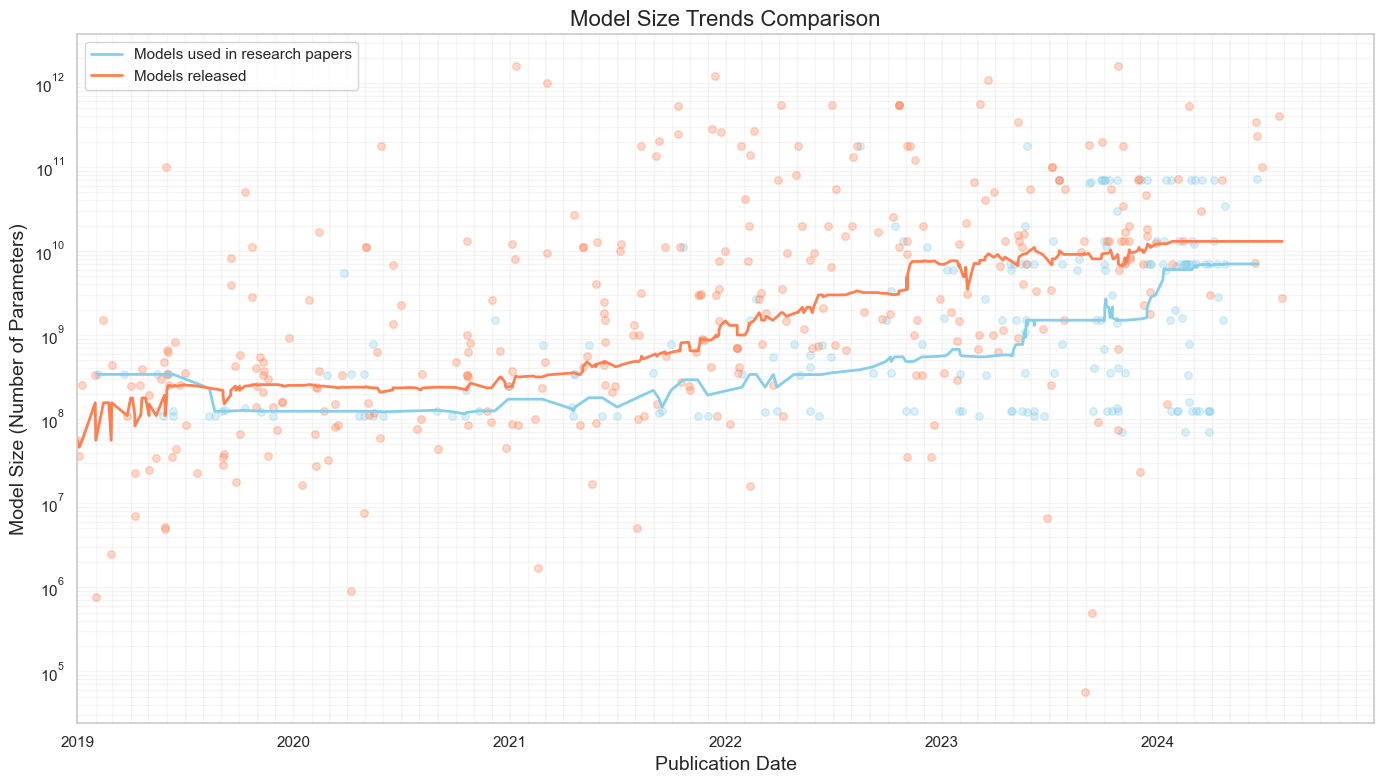

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only_exact_dates.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Prepare the research DataFrame
df_research['date'] = pd.to_datetime(df_research['publication date (first revision)'])
df_research['param_count'] = df_research['param count'].astype(float)

# Prepare the published DataFrame
df_published['date'] = pd.to_datetime(df_published['Publication date'])
df_published['param_count'] = df_published['Parameters'].astype(float)

# Filter published DataFrame for years 2019-2024
df_published = df_published[(df_published['date'] >= '2019-01-01') & (df_published['date'] <= '2024-12-31')]

# Sort both DataFrames by date
df_research = df_research.sort_values(by='date')
df_published = df_published.sort_values(by='date')

# Combine both DataFrames
df_combined = pd.concat([
    df_research[['date', 'param_count']].assign(type='Models used in research'),
    df_published[['date', 'param_count']].assign(type='New released models')
])



# Calculate rolling means
df_research_rolling = df_research.set_index('date').rolling(window='360D').median().reset_index()
df_published_rolling = df_published.set_index('date').rolling(window='360D').median().reset_index()

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(df_research['date'], df_research['param_count'], 
            color='skyblue', alpha=0.3, s=30)
plt.scatter(df_published['date'], df_published['param_count'], 
            color='coral', alpha=0.3, s=30)

# Plot rolling mean lines
plt.plot(df_research_rolling['date'], df_research_rolling['param_count'], 
         color='skyblue', linestyle='-', linewidth=2, label='Models used in research papers')
plt.plot(df_published_rolling['date'], df_published_rolling['param_count'], 
         color='coral', linestyle='-', linewidth=2, label='Models released')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Set labels and title
ax.set_title('Model Size Trends Comparison', fontsize=16)
ax.set_xlabel('Publication Date', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-31'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

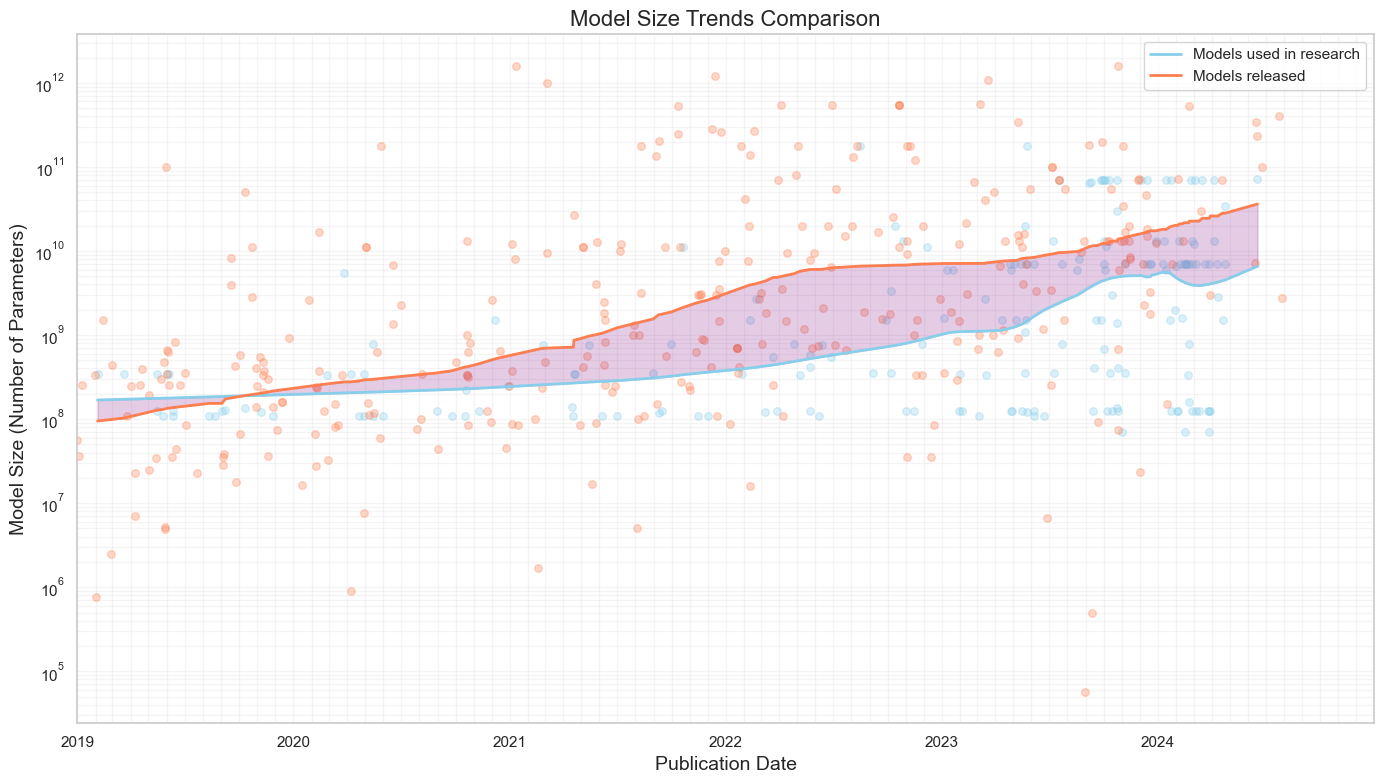

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only_exact_dates.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Prepare the DataFrames
df_research['date'] = pd.to_datetime(df_research['publication date (first revision)'])
df_research['param_count'] = df_research['param count'].astype(float)
df_published['date'] = pd.to_datetime(df_published['Publication date'])
df_published['param_count'] = df_published['Parameters'].astype(float)

# Filter published DataFrame for years 2019-2024
df_published = df_published[(df_published['date'] >= '2019-01-01') & (df_published['date'] <= '2024-12-31')]

# Sort both DataFrames by date
df_research = df_research.sort_values(by='date')
df_published = df_published.sort_values(by='date')

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(df_research['date'], df_research['param_count'], 
            color='skyblue', alpha=0.3, s=30)
plt.scatter(df_published['date'], df_published['param_count'], 
            color='coral', alpha=0.3, s=30)

# Function to calculate LOWESS
def lowess_trend(x, y, f=1./3.):
    return lowess(y, x, frac=f)

# Calculate LOWESS trends
lowess_research = lowess_trend(df_research['date'].astype(int), np.log10(df_research['param_count']))
lowess_published = lowess_trend(df_published['date'].astype(int), np.log10(df_published['param_count']))

# Convert LOWESS results to DataFrames for easier manipulation
df_lowess_research = pd.DataFrame({'date': pd.to_datetime(lowess_research[:, 0]), 'trend': 10**lowess_research[:, 1]})
df_lowess_published = pd.DataFrame({'date': pd.to_datetime(lowess_published[:, 0]), 'trend': 10**lowess_published[:, 1]})

# Merge the two LOWESS DataFrames
df_lowess_merged = pd.merge_asof(df_lowess_research, df_lowess_published, on='date', suffixes=('_research', '_published'))

# Plot LOWESS trends
plt.plot(df_lowess_merged['date'], df_lowess_merged['trend_research'], 
         color='skyblue', linestyle='-', linewidth=2, label='Models used in research')
plt.plot(df_lowess_merged['date'], df_lowess_merged['trend_published'], 
         color='coral', linestyle='-', linewidth=2, label='Models released')

# Add shaded area between the lines
plt.fill_between(df_lowess_merged['date'], 
                 df_lowess_merged['trend_research'], 
                 df_lowess_merged['trend_published'], 
                 alpha=0.2, color='purple')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Set labels and title
ax.set_title('Model Size Trends Comparison', fontsize=16)
ax.set_xlabel('Publication Date', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-31'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

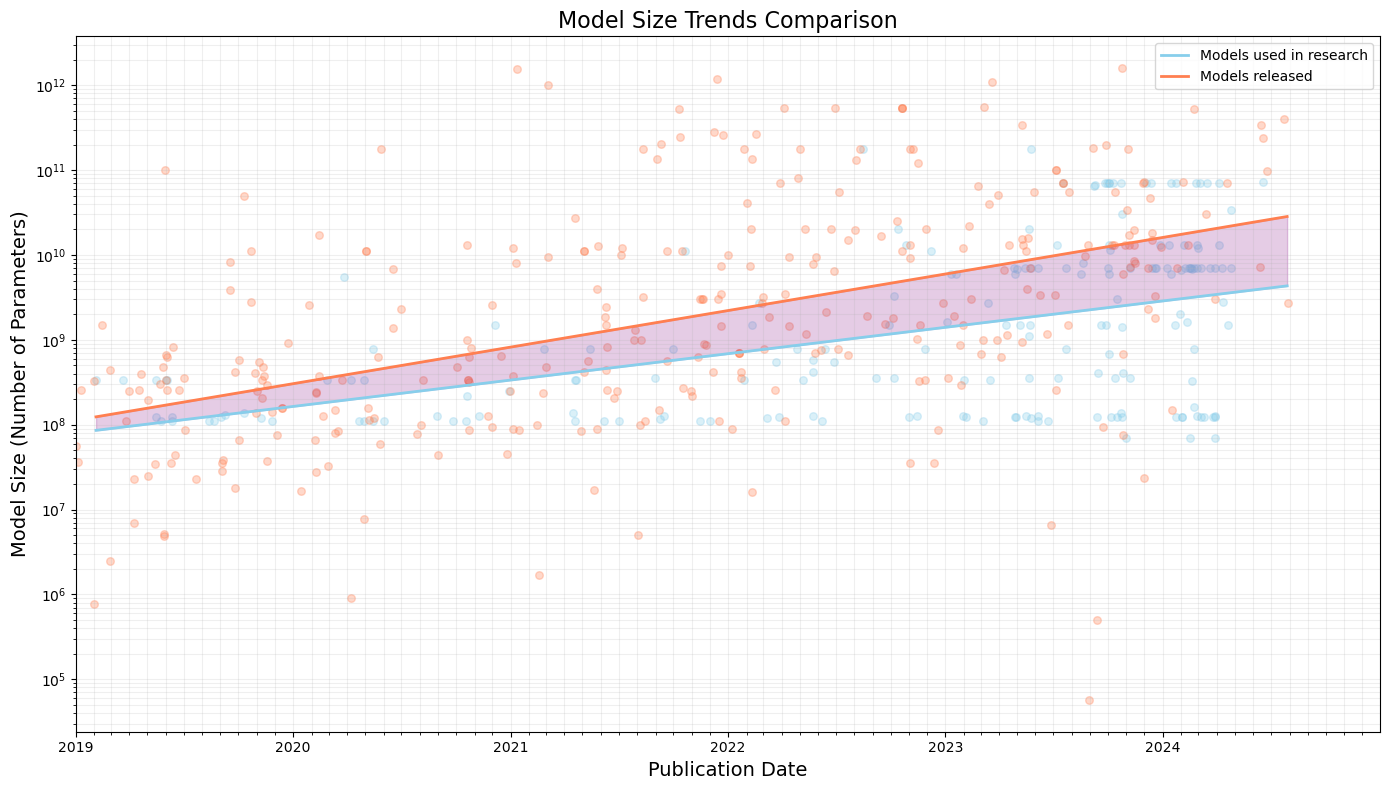

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only_exact_dates.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Prepare the DataFrames
df_research['date'] = pd.to_datetime(df_research['publication date (first revision)'])
df_research['param_count'] = pd.to_numeric(df_research['param count'], errors='coerce')
df_published['date'] = pd.to_datetime(df_published['Publication date'])
df_published['param_count'] = pd.to_numeric(df_published['Parameters'], errors='coerce')

# Filter out rows with NaN in 'param_count'
df_research = df_research.dropna(subset=['param_count'])
df_published = df_published.dropna(subset=['param_count'])

# Filter published DataFrame for years 2019-2024
df_published = df_published[(df_published['date'] >= '2019-01-01') & (df_published['date'] <= '2024-12-31')]

# Sort both DataFrames by date
df_research = df_research.sort_values(by='date')
df_published = df_published.sort_values(by='date')

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(df_research['date'], df_research['param_count'], 
            color='skyblue', alpha=0.3, s=30)
plt.scatter(df_published['date'], df_published['param_count'], 
            color='coral', alpha=0.3, s=30)

# Function to perform linear regression
def linear_trend(x, y):
    x = x.values.reshape(-1, 1)  # Reshape for linear regression
    model = LinearRegression()
    model.fit(x, np.log10(y))
    return model

# Convert dates to ordinal (numeric format for regression)
df_research['date_ordinal'] = df_research['date'].map(pd.Timestamp.toordinal)
df_published['date_ordinal'] = df_published['date'].map(pd.Timestamp.toordinal)

# Fit linear regression models
model_research = linear_trend(df_research['date_ordinal'], df_research['param_count'])
model_published = linear_trend(df_published['date_ordinal'], df_published['param_count'])

# Generate trend lines
x_vals = np.arange(df_research['date_ordinal'].min(), df_published['date_ordinal'].max()).reshape(-1, 1)
research_trend = 10**model_research.predict(x_vals)
published_trend = 10**model_published.predict(x_vals)

# Convert ordinal values back to dates
dates = pd.to_datetime([pd.Timestamp.fromordinal(int(x)) for x in x_vals])

# Plot linear regression trends
plt.plot(dates, research_trend, color='skyblue', linestyle='-', linewidth=2, label='Models used in research')
plt.plot(dates, published_trend, color='coral', linestyle='-', linewidth=2, label='Models released')

# Add shaded area between the lines
plt.fill_between(dates, research_trend, published_trend, alpha=0.2, color='purple')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Set labels and title
ax.set_title('Model Size Trends Comparison', fontsize=16)
ax.set_xlabel('Publication Date', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-31'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
